In [3]:
import vaex

import numpy as np
# import matplotlib.pyplot as plt
import vaex.jupyter
import vaex.jupyter.model as vjm
import pylab as plt

import ipyvolume as ipv
import bqplot

import seaborn as sns

import pandas as pd

In [1]:
#from tvtk.api import tvtk
#from mayavi.scripts import mayavi2
#from mayavi.mlab import *

In [7]:
#hdf_key = 'hdf_key'
#df_cols_to_index = ['value','backvalue','sign'] # list of columns (labels) that should be indexed
#store = pd.HDFStore('hdf_ann')

#for chunk in pd.read_csv('assets/annotation_example3.txt', chunksize=500000):
    # don't index data columns in each iteration - we'll do it later ...
 #   store.append(hdf_key, chunk, data_columns=df_cols_to_index, index=False)
    # index data columns in HDFStore

#store.create_table_index(hdf_key, columns=df_cols_to_index, optlevel=9, kind='full')
#store.close()

INFO:MainThread:numexpr.utils:NumExpr defaulting to 4 threads.


In [9]:
#import csv
#reader = csv.reader(open('assets/annotation_example3.txt', "rU"), delimiter=';')
#writer = csv.writer(open('assets/annotation_example4.csv', 'w'), delimiter=',')
#writer.writerows(reader)

C:\Users\Buffel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [4]:
#reader = pd.read_csv('assets/annotation_example3.txt', delimiter=";")

#for i, df in enumerate(vaex.from_csv('assets/annotation_example3.txt', chunk_size=100_000, delimiter=";")):
 #   df.export_hdf5(f'example_{i:02}.hdf5')
df = vaex.from_csv('assets/annotation_example4.csv')
df

#          pos_id         barcode      run_id    test_date         sign    value    backvalue
0          1001200171739  100129017HD  10        2017-07-07 03:07  s       88.33    131.05
1          1001200171741  100129017HD  10        2017-07-07 03:07  s       98.66    95.69
2          1001200171742  100129017HD  10        2017-07-07 03:07  s       35.03    70.9
3          1001200171743  100129017HD  10        2017-07-07 03:07  s       99.09    79.79
4          1001200171744  100129017HD  10        2017-07-07 03:07  s       82.09    143.5
...        ...            ...          ...       ...               ...     ...      ...
5,314,513  1002401471415  100249147HD  9         2017-07-07 08:07  s       91.29    62.59
5,314,514  1002401531627  100249153HD  9         2017-07-07 07:07  s       98.03    87.89
5,314,515  1002401533112  100249153HD  9         2017-07-07 07:07  s       83.06    167.81
5,314,516  1002401521415  100249152HD  9         2017-07-07 08:07  s       91.04    104.61
5,314,517  1002401522930  100249152HD  9         2017-07-07 08:07  s       93.61    155.02

In [3]:
#df1 = pd.read_csv('assets/annotation_example4.csv')
#df1 = vaex.from_pandas(df1)
#df1.head(5)

#         pos_id  barcode        run_id  test_date         sign      value    backvalue    index
  0  1001200171739  100129017HD        10  2017-07-07 03:07  s         88.33       131.05        0
  1  1001200171741  100129017HD        10  2017-07-07 03:07  s         98.66        95.69        1
  2  1001200171742  100129017HD        10  2017-07-07 03:07  s         35.03        70.9         2
  3  1001200171743  100129017HD        10  2017-07-07 03:07  s         99.09        79.79        3
  4  1001200171744  100129017HD        10  2017-07-07 03:07  s         82.09       143.5         4

In [4]:
#df1 = None

In [5]:
#df.head(5)
#df = df['value','backvalue', 'sign']
df = df['value', 'backvalue', 'sign']
print(len(df))
length = len(df)
df

5314518


#          value    backvalue    sign
0          88.33    131.05       s
1          98.66    95.69        s
2          35.03    70.9         s
3          99.09    79.79        s
4          82.09    143.5        s
...        ...      ...          ...
5,314,513  91.29    62.59        s
5,314,514  98.03    87.89        s
5,314,515  83.06    167.81       s
5,314,516  91.04    104.61       s
5,314,517  93.61    155.02       s

In [6]:
@vaex.register_function()
def signToNumber(s):
    return ['n','z','p','s','f'].index(s)

df['signNumber'] = df.apply(signToNumber, arguments=[df.sign])


# count signs:
df.groupby(by='signNumber').agg({'signNumber': 'count'})

#    signNumber             count
  0             3       4.25803e+06
  1             4  164522
  2             0  880350
  3             2    7744
  4             1    3872

In [7]:

#dfOF = df[df[df.signNumber == 0 or df.signNumber == 1 or df.signNumber == 2 or df.signNumber == 3]]
#print(len(dfOF))
#display(dfOF.head(5))
dfWF = df[df.signNumber !=  4]
display(dfWF)
print(len(dfWF))


#          value    backvalue    sign    signNumber
0          88.33    131.05       s       3
1          98.66    95.69        s       3
2          35.03    70.9         s       3
3          99.09    79.79        s       3
4          82.09    143.5        s       3
...        ...      ...          ...     ...
5,149,991  91.29    62.59        s       3
5,149,992  98.03    87.89        s       3
5,149,993  83.06    167.81       s       3
5,149,994  91.04    104.61       s       3
5,149,995  93.61    155.02       s       3

5149996


In [8]:
# Data cleansing
df = dfWF
stdValue = df.std('value')
stdBackvalue = df.std('backvalue')
meanValue = df.mean('value')
meanBackvalue = df.mean('backvalue')
print("min value: " +str(df.min('value')))
print("max value: "+str(df.max('value')))
print("meanValue: " +str(meanValue))
print("stdValue: "+ str(stdValue))
print()
print("min backvalue: " +str(df.min('backvalue')))
print("max backvalue: " +str(df.max('backvalue')))
print("meanBackvalue: " + str(meanBackvalue))
print("stdBackvalue: " +str(stdBackvalue))
print()

meanPlusMinus2StdValue = (meanValue-2*stdValue, meanValue +2*stdValue)
meanPlusMinus3StdValue = (meanValue-3*stdValue, meanValue +3*stdValue)

meanPlusMinus2StdBackvalue = (meanBackvalue -2*stdBackvalue, meanBackvalue +2*stdBackvalue)
meanPlusMinus3StdBackvalue = (meanBackvalue -3*stdBackvalue, meanBackvalue +3*stdBackvalue)

print("mean +- 2*std of value: " + str(meanPlusMinus2StdValue))
readerMeanPlusMinus2StdValue = df[(df['value'] <= meanPlusMinus2StdValue[1] )
                                          & (df['value'] >= meanPlusMinus2StdValue[0])]
print("values in range: " + str(len(readerMeanPlusMinus2StdValue)) + " equals " 
      + str(100*len(readerMeanPlusMinus2StdValue)/length) + "%")

print("mean +- 2*std of Backvalue: " + str(meanPlusMinus2StdBackvalue))
readerMeanPlusMinus2StdBackvalue = df[(df['backvalue'] <= meanPlusMinus2StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus2StdBackvalue[0])]
print("values in range: " + str(len(readerMeanPlusMinus2StdBackvalue)) + " equals " 
     + str(100*len(readerMeanPlusMinus2StdBackvalue)/length) + "%")

# cleansed dataframe 1
readerCleansedWith2Std = df[(df['value'] <= meanPlusMinus2StdValue[1] )
                                          & (df['value'] >= meanPlusMinus2StdValue[0])
                                   & (df['backvalue'] <= meanPlusMinus2StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus2StdBackvalue[0])]
print("values in specified 2std range: " +str(len(readerCleansedWith2Std)) + " equals " 
     + str(100* len(readerCleansedWith2Std)/length))
print()


print("mean +- 3*std of value: " + str(meanPlusMinus3StdValue))
readerMeanPlusMinus3StdValue = df[(df['value'] <= meanPlusMinus3StdValue[1]) 
                                          & (df['value'] >= meanPlusMinus3StdValue[0])]
print("values in range: " + str(len(readerMeanPlusMinus3StdValue)) + " equals " 
     + str(100*(len(readerMeanPlusMinus3StdValue)/length)) + "%")

print("mean +- 3*std of Backvalue: " + str(meanPlusMinus3StdBackvalue))
readerMeanPlusMinus3StdBackvalue = df[(df['backvalue'] <= meanPlusMinus3StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
print("values in range: " + str(len(readerMeanPlusMinus3StdBackvalue)) + " equals "
     + str(100*len(readerMeanPlusMinus3StdBackvalue)/length) + "%")

# cleansed dataframe 2
readerCleansedWith3Std = df[(df['value'] <= meanPlusMinus3StdValue[1] )
                                          & (df['value'] >= meanPlusMinus3StdValue[0])
                                   & (df['backvalue'] <= meanPlusMinus3StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
print("values in specified 3std range: " +str(len(readerCleansedWith3Std)) + " equals " 
     + str(100* len(readerCleansedWith3Std)/length))
print()

min value: 0.0
max value: 619.03
meanValue: 94.05266201760894
stdValue: 18.66048197375856

min backvalue: 0.0
max backvalue: 31920.81
meanBackvalue: 102.65947098404949
stdBackvalue: 257.3339421582796

mean +- 2*std of value: (56.73169807009182, 131.37362596512605)
values in range: 4864692 equals 91.53590222104808%
mean +- 2*std of Backvalue: (-412.00841333250975, 617.3273553006087)
values in range: 5133695 equals 96.59756538598609%
values in specified 2std range: 4859416 equals 91.43662699044391

mean +- 3*std of value: (38.07121609633326, 150.03410793888463)
values in range: 4999367 equals 94.06999844576686%
mean +- 3*std of Backvalue: (-669.3423554907895, 874.6612974588884)
values in range: 5138315 equals 96.68449707010119%
values in specified 3std range: 4995592 equals 93.99896660430917



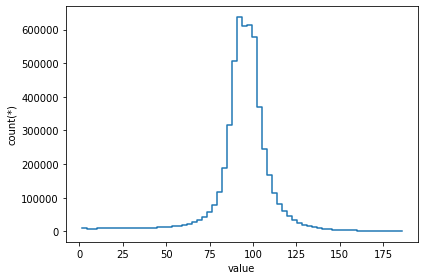

In [5]:
df.plot1d(df.value)


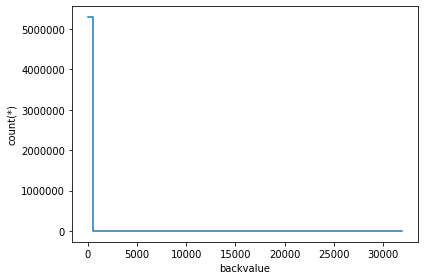

In [32]:
df.plot1d(df.backvalue)

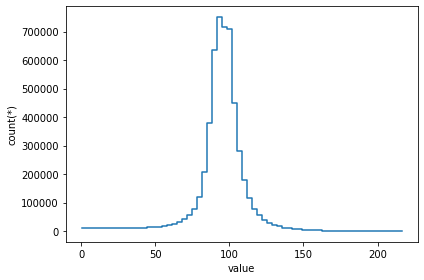

In [60]:
df.plot1d(df.value, limits='99.9%')
#df.plot1d(readerMeanPlusMinus3StdValue.value)


<IPython.core.display.Javascript object>


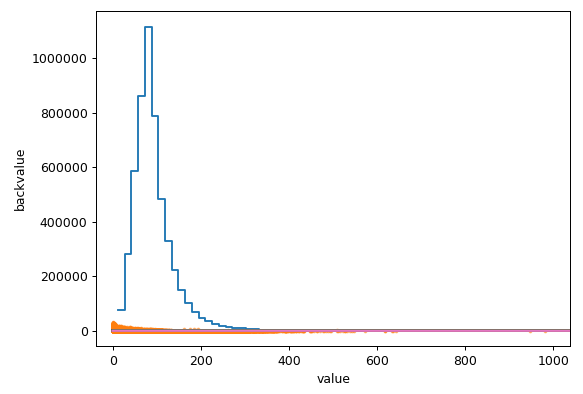

In [28]:
df.plot1d(df.backvalue, limits = '99.5%')

In [31]:
#xycounts = df.count(binby=[df.value, df.backvalue], limits=[[25, 175], [0, 300]], shape=(64, 128))
#plt.plot(np.linspace(df.min('value'), df.max('backvalue'), 64), xycounts)
#plt.show()

In [33]:
df.scatter(df.value, df.backvalue, alpha=0.5,s=4.,length_check = False)
#plt.axhline(meanPlusMinus3StdBackvalue[1], color = 'black')
#plt.axvline(meanPlusMinus3StdValue[1], color = 'black')

5300551


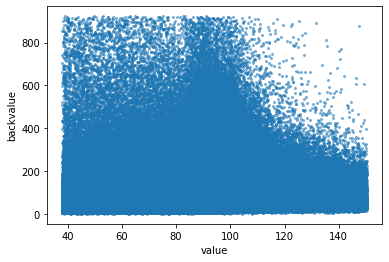

In [6]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue, alpha=0.5, s=4., length_check = False)


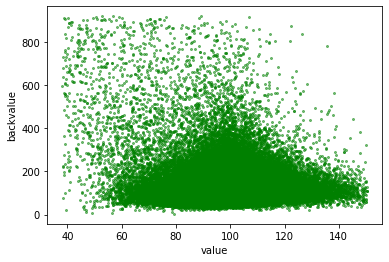

In [62]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'f', c="green", alpha=0.5, s=4., length_check = False);

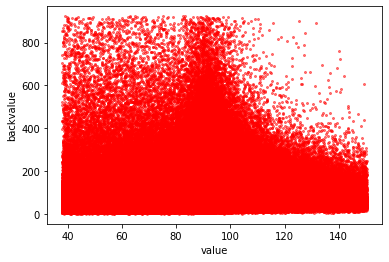

In [69]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False);

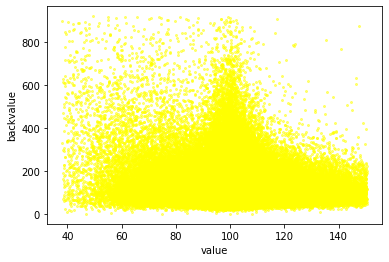

In [70]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False);

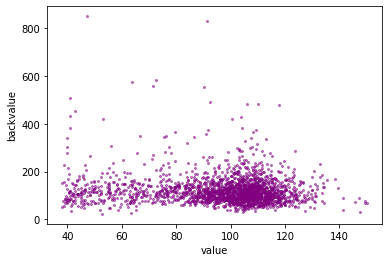

In [71]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False);

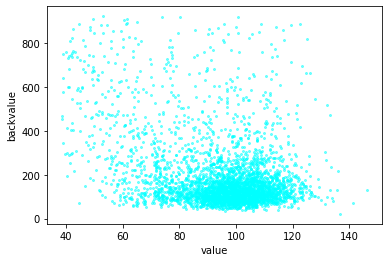

In [72]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False);

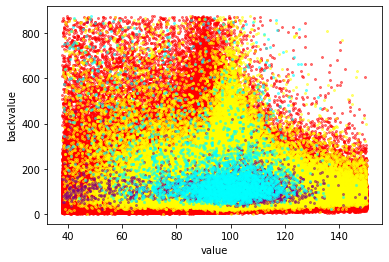

In [7]:
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
plt.show()

In [1]:

#readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
#plt.show()
#readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
#plt.show()
#readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
#plt.show()
#readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
#plt.show()

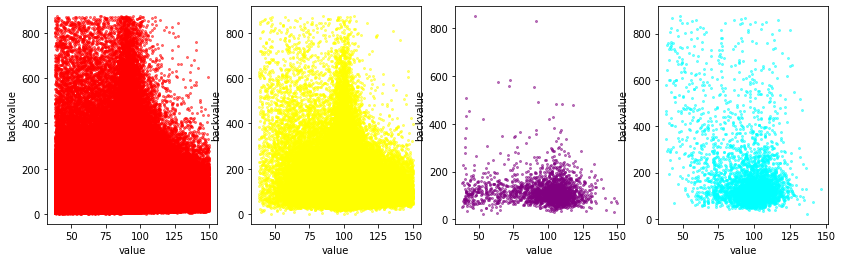

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))
plt.sca(ax1)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
plt.sca(ax2)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
plt.sca(ax3)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
plt.sca(ax4)
readerCleansedWith3Std.scatter(readerCleansedWith3Std.value, readerCleansedWith3Std.backvalue,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)


In [2]:
#(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'n'].heatmap('value','backvalue',  colorbar= True, c = 'Green'))


In [20]:
#df.head(2000000)

#          value    backvalue    sign    index    signNumber
0          88.33    131.05       s       0        4
1          98.66    95.69        s       1        4
2          99.09    79.79        s       3        4
3          82.09    143.5        s       4        4
4          85.89    93.45        s       5        4
...        ...      ...          ...     ...      ...
1,999,995  102.13   81.87        n       2084528  1
1,999,996  89.84    151.01       n       2084529  1
1,999,997  97.3     98.22        n       2084530  1
1,999,998  108.76   128.58       s       2084531  4
1,999,999  87.82    180.76       s       2084532  4

In [16]:
# readerCleansedWith3Std.plot3d(readerCleansedWith3Std['value'],readerCleansedWith3Std['backvalue'],readerCleansedWith3Std['signNumber'])
# 3d plot
np.seterr(divide='print', invalid='print')

df.plot_widget('value', 'backvalue', 'signNumber', s=0.3,opacity=[0.01],cmap='viridis',  backend='ipyvolume')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(camera=PerspectiveCamera(fov=45.0…

Plot2dDefault(w=None, what='count(*)', x='value', y='backvalue', z='signNumber')

In [9]:
selection_widget = readerCleansedWith3Std.widget.selection_expression('default')

display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'n'].widget.heatmap('value', 'backvalue', selection=[None, True,selection_widget], selection_interact='default', colorbar= True))
await vaex.jupyter.gather()
display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 's'].widget.heatmap('value','backvalue', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'z'].widget.heatmap('value','backvalue', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'p'].widget.heatmap('value','backvalue', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [10]:

display(readerCleansedWith3Std.widget.heatmap('value','backvalue', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(selection_widget)


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

ExpressionSelectionTextArea(error_messages="Column or variable 'default' does not exist.", label='Filter by cu…

In [29]:
#fig, ax1 = plt.subplots(1, 1, figsize=(14,4))
#plt.sca(ax1)
histogram = readerCleansedWith3Std.widget.histogram(readerCleansedWith3Std.signNumber, what=np.log(vaex.stat.count()+1), selection=[None, True, selection_widget], selection_interact='default',limits=[-1, 4])
histogram.tool = 'select-x'
histogram
# plot log, transpose diagramm, scatter mit selection

Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

In [35]:
sc1 = readerCleansedWith3Std.scatter(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 's'].value, readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 's'].backvalue, c="red", alpha=0.5, s=4., length_check = False, selection=selection_widget)
sc2 = readerCleansedWith3Std.scatter(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'n'].value, readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'n'].backvalue, c="yellow", alpha=0.5, s=4., length_check = False, selection= selection_widget)
sc3 = readerCleansedWith3Std.scatter(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'z'].value, readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'z'].backvalue, c="purple", alpha=0.5, s=4., length_check = False, selection=selection_widget)
sc4 = readerCleansedWith3Std.scatter(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'p'].value, readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'p'].backvalue, c="cyan", alpha=0.5, s=4., length_check = False, selection=selection_widget)
sc1.tool = 'select-rect'
sc2.tool = 'select-rect'
sc3.tool = 'select-rect'
sc4.tool = 'select-rect'
sc1
sc2
sc3
sc4
plt.show()

ValueError: ExpressionSelectionTextArea(label='Filter by custom expression', placeholder='Enter a custom (boolean) expression', prepend_icon='filter_list', v_model='signNumber == 0') is not of string or Expression type, but <class 'vaex.jupyter.widgets.ExpressionSelectionTextArea'>

In [9]:

#readerCleansedWith3Std = readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'f']

display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 's'].widget.heatmap('value','backvalue',  colorbar= True, cmap = 'Reds'))
display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'n'].widget.heatmap('value','backvalue',  colorbar= True, c = 'Green'))



Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [6]:
display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'z'].widget.heatmap('value','backvalue',  colorbar= True, cmap = 'Purples'))
display(readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 'p'].widget.heatmap('value','backvalue',  colorbar= True, cmap = 'BuGn'))

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [ ]:
readerCleansedWith3Std[readerCleansedWith3Std['sign'] == 's'].widget.heatmap('value','backvalue',  colorbar= True)


In [23]:
readerCleansedWith3Std.categorize('signNumber')  # treat the id as a categorical column - automatically adjusts limits and shape
xarr = readerCleansedWith3Std.count(binby=['value', 'backvalue', 'signNumber'], limits='99%', array_type='xarray')
(xarr).plot(col='signNumber', col_wrap=3);



TypeError: count() got an unexpected keyword argument 'array_type'

In [9]:
%matplotlib nbagg
readerCleansedWith3Std = df[(df['value'] <= meanPlusMinus3StdValue[1] )
                                          & (df['value'] >= meanPlusMinus3StdValue[0])
                                   & (df['backvalue'] <= meanPlusMinus3StdBackvalue[1]) 
                                          & (df['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
#plt.plot(x, y)
sns.heatmap(readerCleansedWith3Std['value'], readerCleansedWith3Std['backvalue'])
#sns.displot(data, x="value",y="backvalue", hue="sign", kind="kde")



C:\Users\Buffel\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Must pass 2-d input. shape=()

In [2]:
#import plotly.express as px
df = pd.read_csv('assets/annotation_example3.txt', delimiter= ";")
df = df[['sign','value','backvalue']]
#fig = px.scatter_3d(df, x='value', y='backvalue', z='value',
 #             color='sign')
#fig.show()

In [40]:
# libraries
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=30000
k = kde.gaussian_kde([df.value,df.backvalue])
xi, yi = np.mgrid[ df.value.min():df.backvalue.max():nbins*1j, df.backvalue.min():df.backvalue.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'value': xi.flatten(), 'backvalue': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.value, data.backvalue, data.signNumber, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [16]:
import swifter

df['signNumber'] = df.sign.apply(signToNumber)



In [73]:
@vaex.register_function()
def signToNumber(s):
    return ['f','n','z','p','s'].index(s)

readerCleansedWith3Std['signNumber'] = readerCleansedWith3Std.apply(signToNumber, arguments=[df.sign])


# count signs:
readerCleansedWith3Std.groupby(by='signNumber').agg({'signNumber': 'count'})

#    signNumber             count
  0             4       4.11411e+06
  1             0  160949
  2             3    3762
  3             2    2202

In [53]:
readerCleansedWith3Std.head(2000000)

#          value    backvalue    sign    signNumber
0          88.33    131.05       s       4
1          98.66    95.69        s       4
2          99.09    79.79        s       4
3          82.09    143.5        s       4
4          85.89    93.45        s       4
...        ...      ...          ...     ...
1,999,995  102.13   81.87        n       1
1,999,996  89.84    151.01       n       1
1,999,997  97.3     98.22        n       1
1,999,998  108.76   128.58       s       4
1,999,999  87.82    180.76       s       4

In [13]:
#readerCleansedWith3Std.plot3d('value', 'backvalue', 'signNumber')
#fig = ipv.figure()
#scatter = ipv.scatter(readerCleansedWith3Std['value'],readerCleansedWith3Std['backvalue'], readerCleansedWith3Std['signNumber'])
#ipv.show()
readerCleansedWith3Std.plot_widget('value', 'backvalue')


PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='value', y='backvalue', z=None)

In [16]:
df.plot_widget(df.value, df.backvalue, f='log',z = df.signNumber)

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='value', y='backvalue', z='signNumber')

In [ ]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.

s = mesh(x, y, z)
show()

In [ ]:
import numpy as np


def test_barchart():
    """ Demo the bar chart plot with a 2D array.
    """
    s = np.abs(np.random.random((3, 3)))
    return barchart(s)
b = test_barchart()
mlab.show()

In [2]:

from chartpy import Chart, Style


In [3]:
df = pd.read_csv('assets/annotation_example3.txt', delimiter=";")


In [10]:
df.head(5)
df1 = df[['value', 'backvalue']]

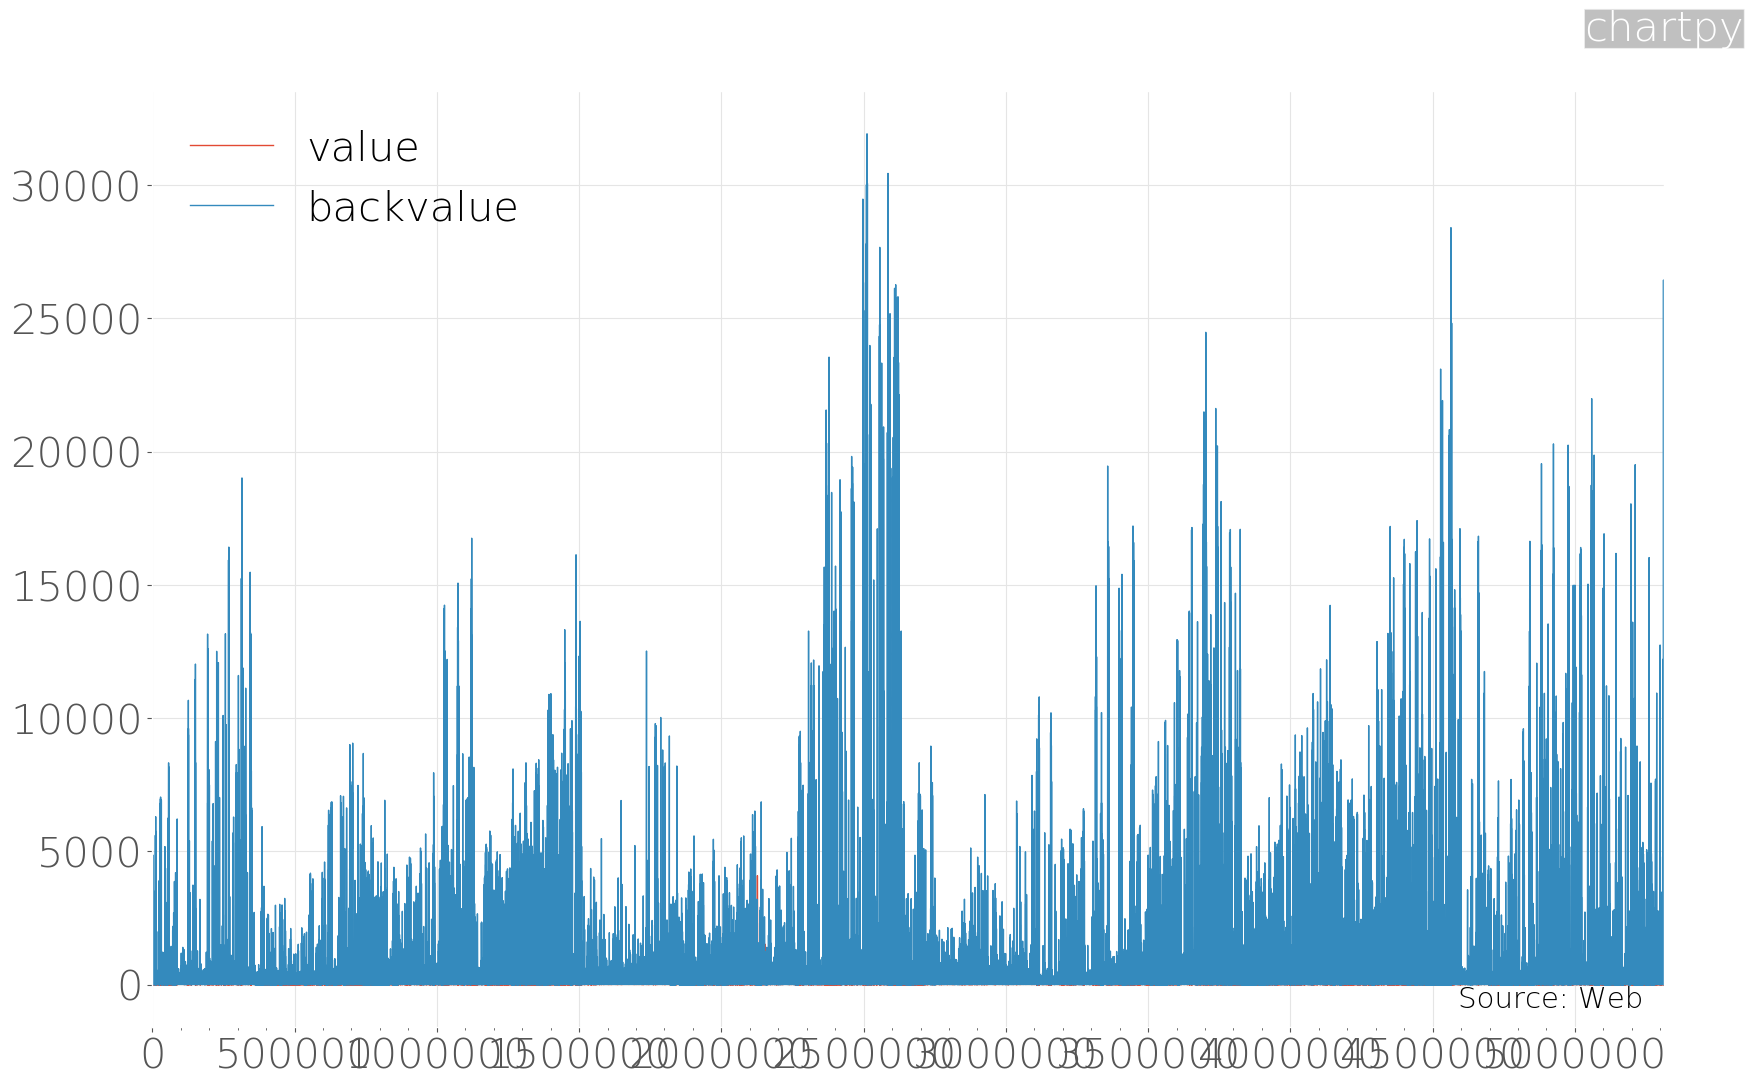

In [11]:
chart = Chart()
chart.plot(df = df1)

# set the style of the plot (title, source & scale sized)
style = Style(title="US GDP", source="Quandl/Fred", scale_factor=1)
chart = Chart(df=df, chart_type='line', style=style)

# make sure we plot matplotlib, bokeh and plotly inline in the notebook!
%matplotlib inline
style.bokeh_plot_mode = 'offline_jupyter'
style.plotly_plot_mode = 'offline_jupyter'

In [ ]:
chart.plot(engine='plotly')

In [ ]:
chart.plot(engine='matplotlib')

In [ ]:
chart.plot(engine='bokeh')